<a href="https://colab.research.google.com/github/karamih/Helmet_detection/blob/master/Helmet_detection_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object Detection -> YOLO V8

make sure to change run time to gpu.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 7.1 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import Image, display

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
import os

Home = os.getcwd()
Home

'/content'

## Getting data from roboflow


In [ ]:
!mkdir {Home}/datasets
%cd {Home}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7N79litXnSci7JtMDYwZ")
project = rf.workspace("own-ns5nt").project("hard-hat-sample-f9qdp")
dataset = project.version(3).download("yolov8")

dataset.location

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Success

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.182, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov8:: 100%|██████████| 211/211 [00:00<00:00, 6862.53it/s]


'/content/datasets/Hard-Hat-Sample-3'

##Train

In [ ]:
%cd {Home}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml device=0 batch=8 epochs=120

/content
Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Hard-Hat-Sample-3/data.yaml, epochs=120, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
Home

'/content'

In [ ]:
%ls {Home}/runs/detect/train2

args.yaml                                           train_batch0.jpg
confusion_matrix_normalized.png                     train_batch1.jpg
confusion_matrix.png                                train_batch2.jpg
events.out.tfevents.1695216947.2e4ed7d58912.4082.0  train_batch990.jpg
F1_curve.png                                        train_batch991.jpg
labels_correlogram.jpg                              train_batch992.jpg
labels.jpg                                          val_batch0_labels.jpg
P_curve.png                                         val_batch0_pred.jpg
PR_curve.png                                        val_batch1_labels.jpg
R_curve.png                                         val_batch1_pred.jpg
results.csv                                         weights/
results.png


##Visualize

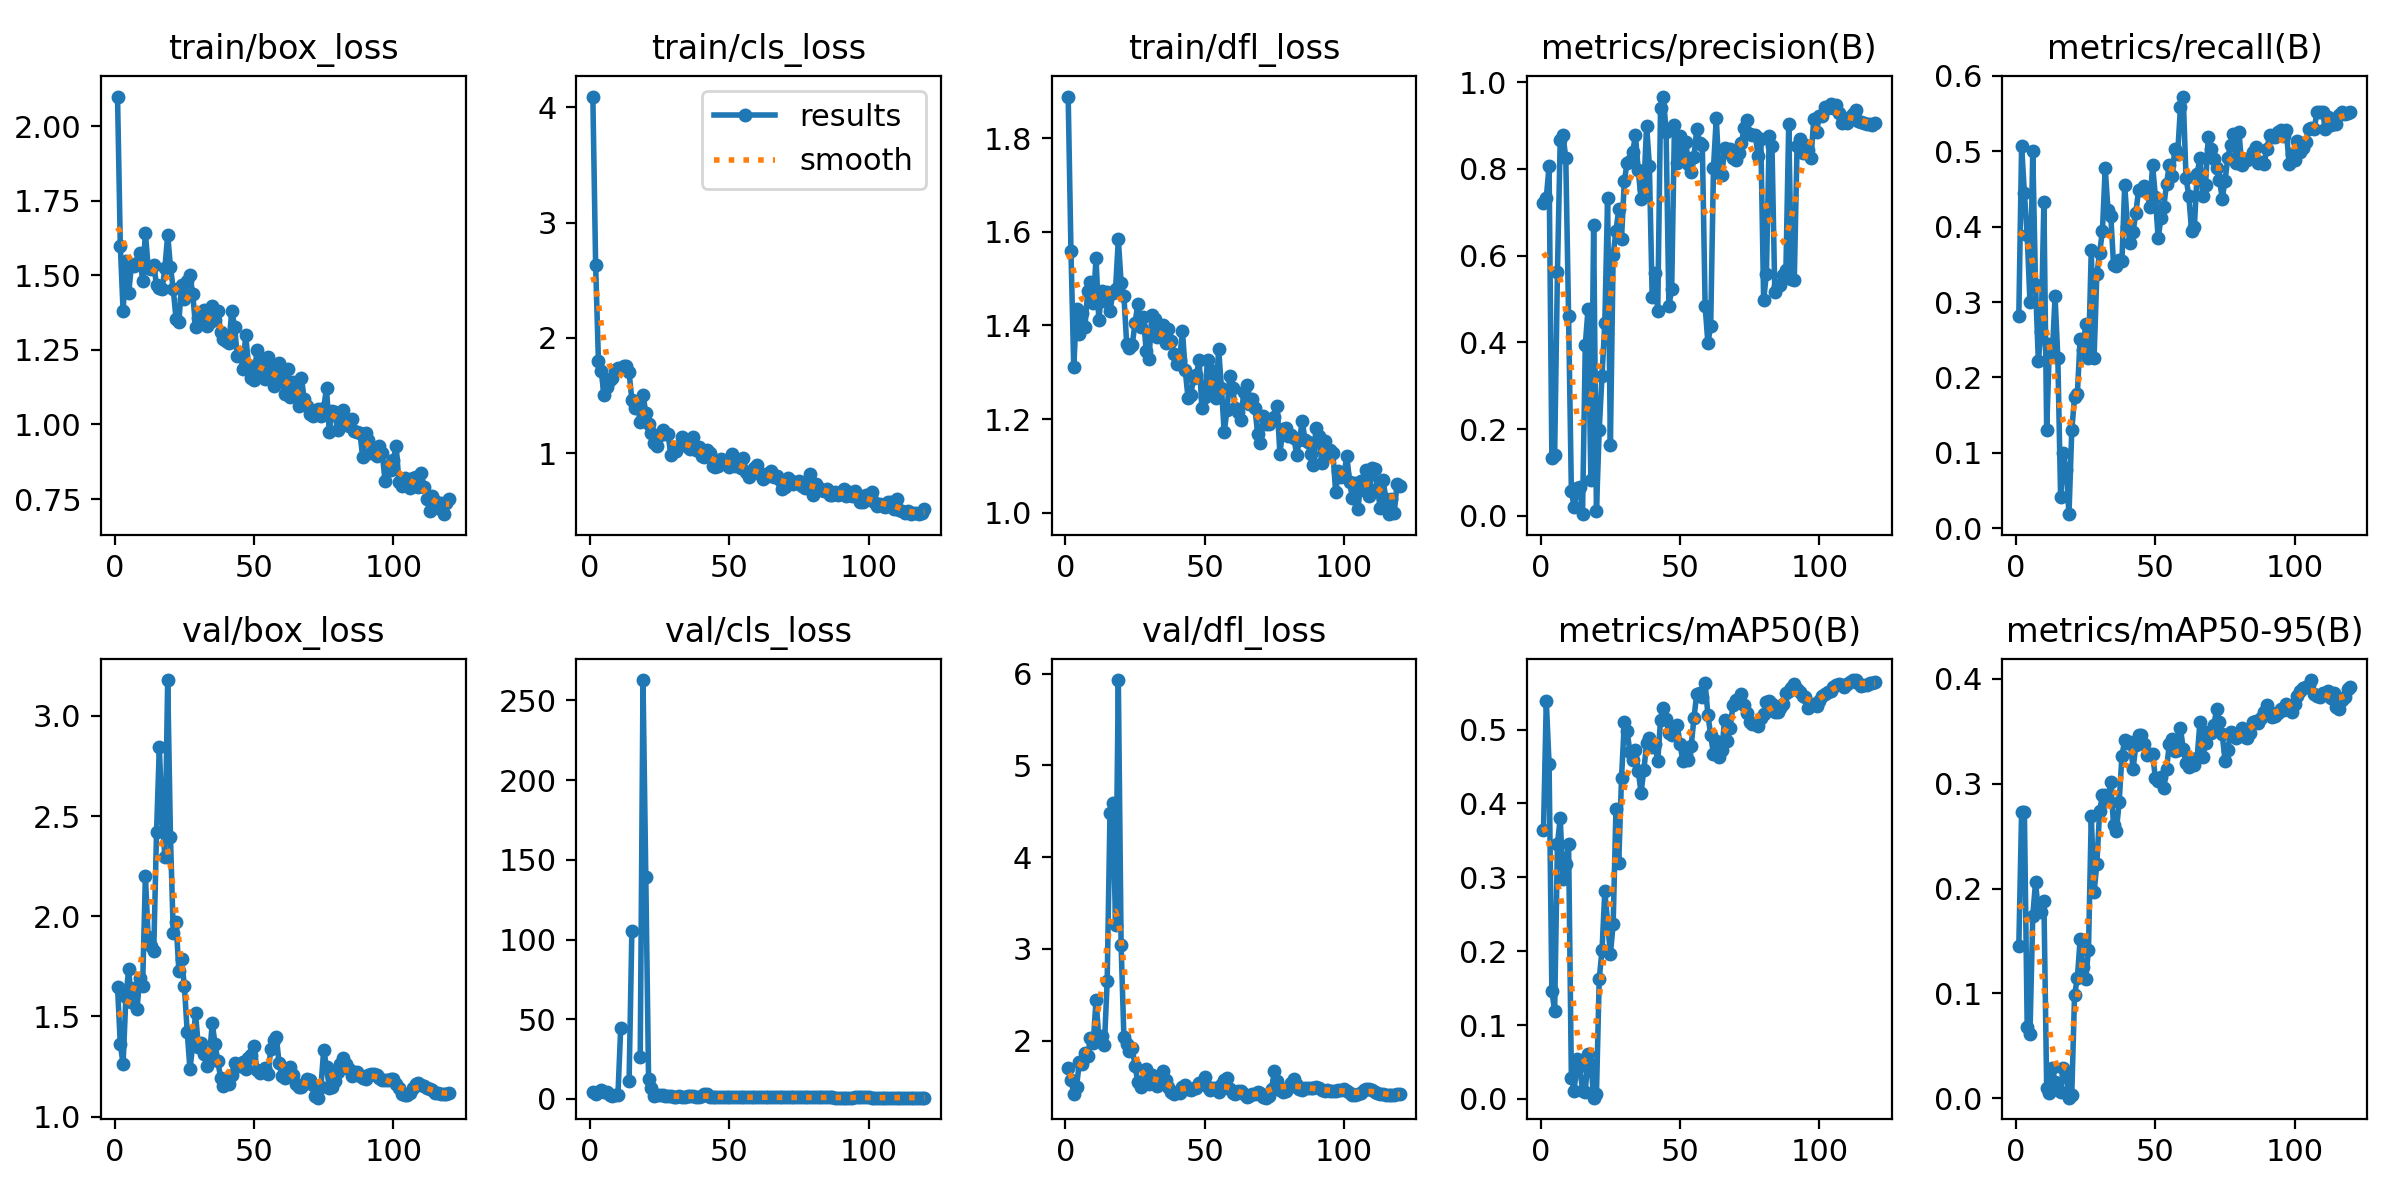

In [ ]:
Image(filename=f"{Home}/runs/detect/train2/results.png", width=700)

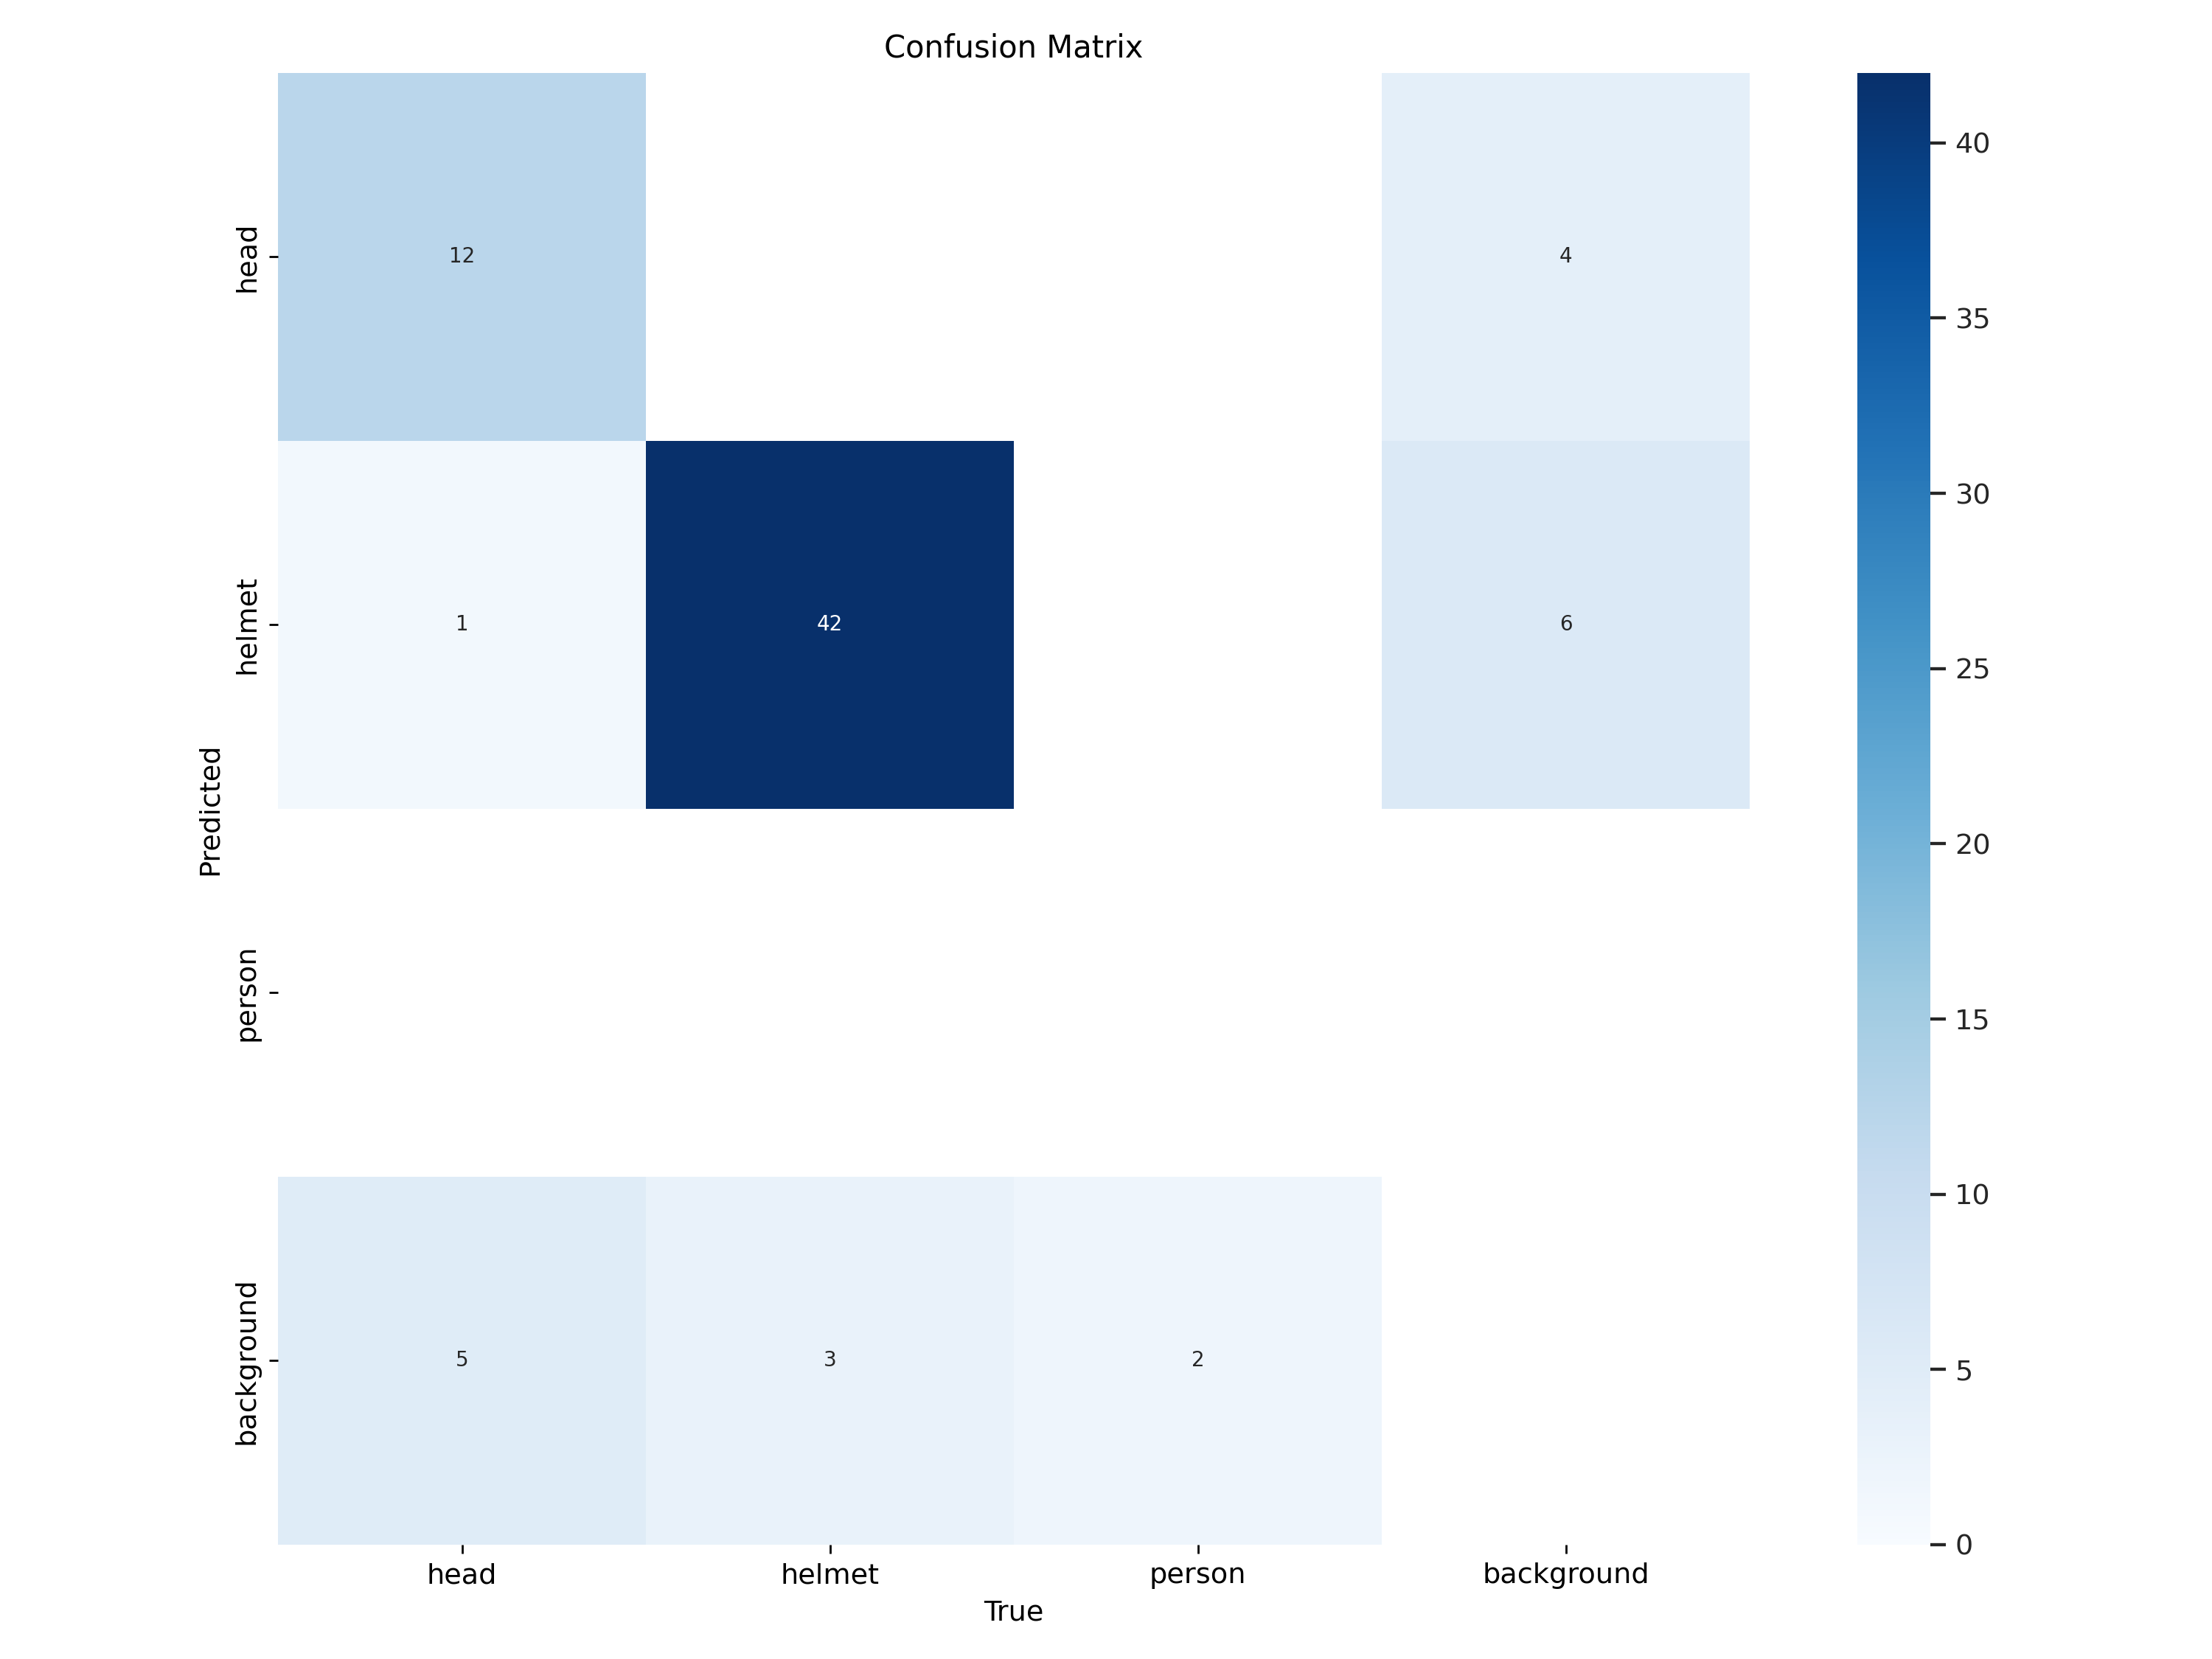

In [ ]:
Image(filename=f"{Home}/runs/detect/train2/confusion_matrix.png", width=700)

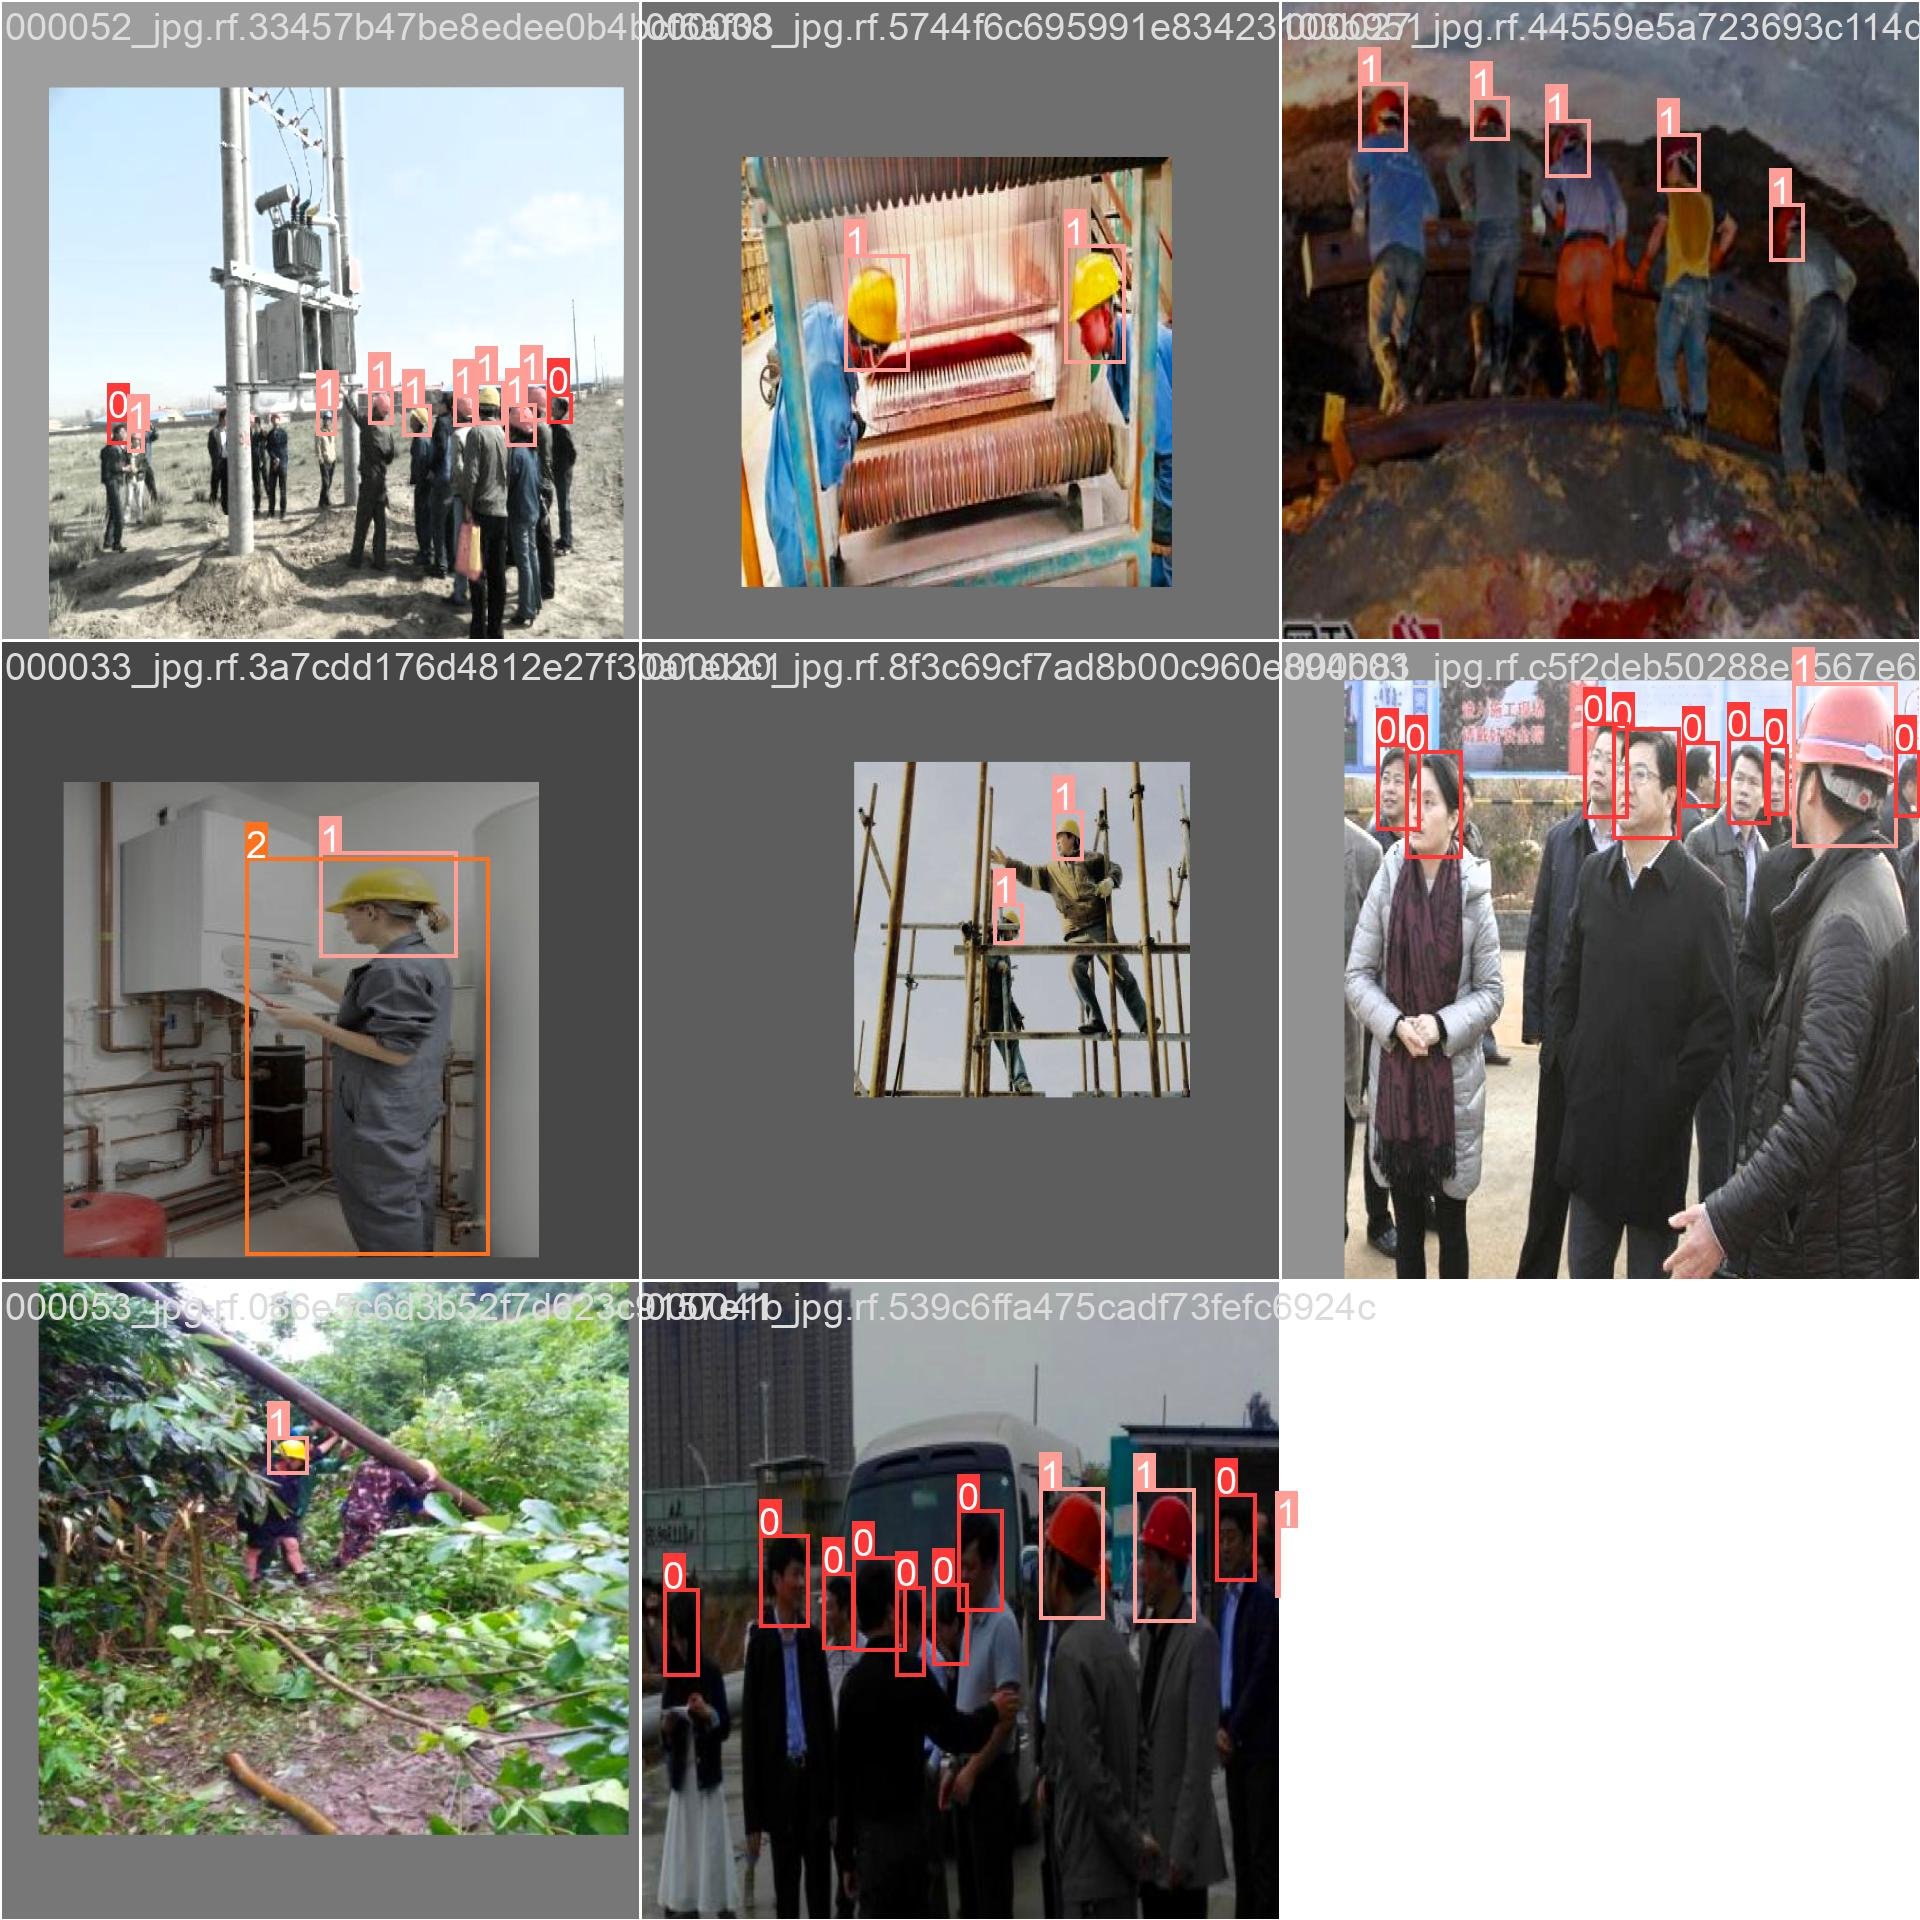

In [ ]:
Image(filename=f"{Home}/runs/detect/train2/train_batch990.jpg", width=700)

##Inference

In [ ]:
!yolo task=detect mode=predict model={Home}/runs/detect/train2/weights/best.pt source={Home}/datasets/Hard-Hat-Sample-3/test/images conf=0.5

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

image 1/10 /content/datasets/Hard-Hat-Sample-3/test/images/000008_jpg.rf.c13cef27cc5fcd6a3af8356c89584386.jpg: 640x640 1 helmet, 37.0ms
image 2/10 /content/datasets/Hard-Hat-Sample-3/test/images/000011_jpg.rf.31475eb60e28dacb1cda04839a076209.jpg: 640x640 1 head, 11 helmets, 37.0ms
image 3/10 /content/datasets/Hard-Hat-Sample-3/test/images/000034_jpg.rf.c3a4c6ce08ea54e9412365eff6ee491e.jpg: 640x640 1 helmet, 36.9ms
image 4/10 /content/datasets/Hard-Hat-Sample-3/test/images/000047_jpg.rf.2c5b33b55f8eb482478bd8e9f0faf6bc.jpg: 640x640 4 helmets, 36.9ms
image 5/10 /content/datasets/Hard-Hat-Sample-3/test/images/000054_jpg.rf.a39ddc64e0787a76b585aa102159feb0.jpg: 640x640 1 helmet, 30.8ms
image 6/10 /content/datasets/Hard-Hat-Sample-3/test/images/000073_jpg.rf.d6030b0b05b4865252c4e9825930975a.jpg: 640x640 7 helmets, 24.8ms
image 7/10 /con

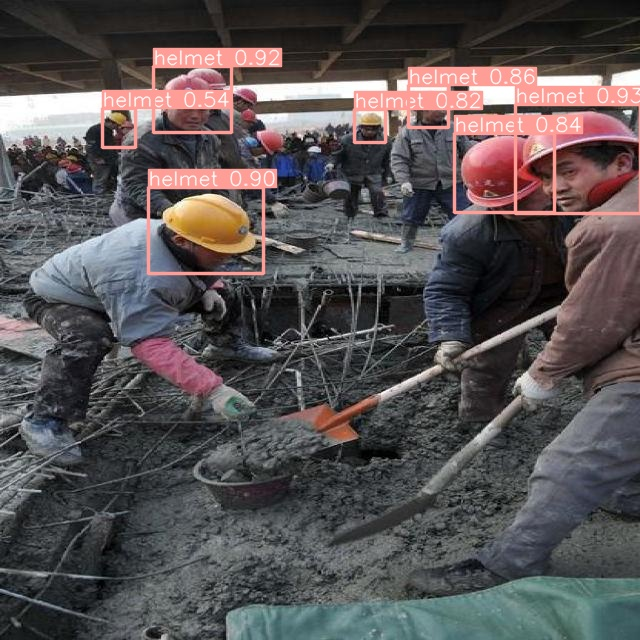

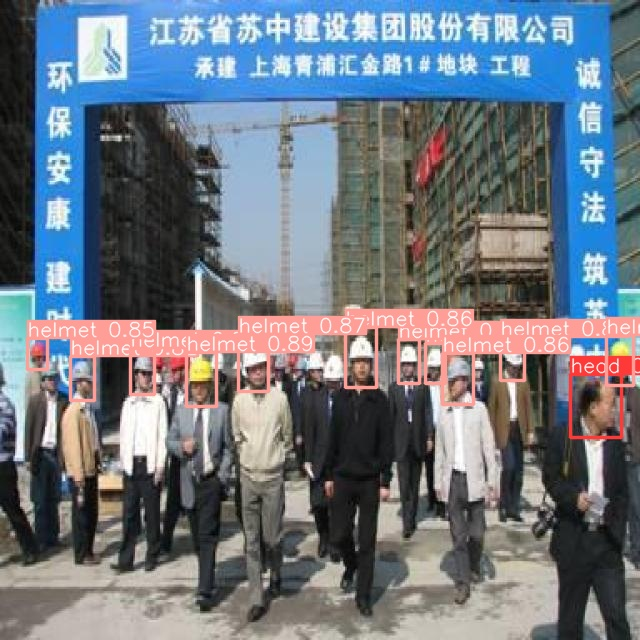

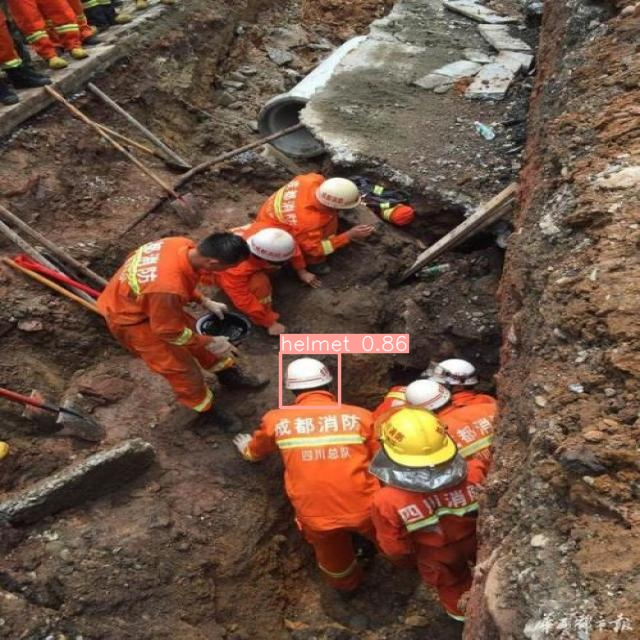

In [ ]:
import glob

for image_path in glob.glob(f'{Home}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

###inference on video

In [ ]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/demo.mp4
100% 42.9M/42.9M [00:02<00:00, 20.6MB/s]


In [ ]:
!yolo task=detect mode=predict model={Home}/runs/detect/train2/weights/best.pt conf=0.5 source={Home}/demo.mp4

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

video 1/1 (1/439) /content/demo.mp4: 384x640 2 helmets, 76.8ms
video 1/1 (2/439) /content/demo.mp4: 384x640 2 helmets, 25.9ms
video 1/1 (3/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (4/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (5/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (6/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (7/439) /content/demo.mp4: 384x640 2 helmets, 25.9ms
video 1/1 (8/439) /content/demo.mp4: 384x640 2 helmets, 25.9ms
video 1/1 (9/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (10/439) /content/demo.mp4: 384x640 2 helmets, 29.0ms
video 1/1 (11/439) /content/demo.mp4: 384x640 2 helmets, 25.8ms
video 1/1 (12/439) /content/demo.mp4: 384x640 2 helmets, 27.9ms
video 1/1 (13/439) /content/demo.mp4: 384x640 2 helmets, 32.4ms
video 1/1 (14/439) /

In [ ]:
from moviepy.editor import *

path=f'{Home}/runs/detect/predict/demo.avi'

clip=VideoFileClip(path)
clip.ipython_display(width=700)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
